Copyright 2021 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.

# Text as data

This notebook introduces foundational concepts in using text as data.
As a result, this notebook is just reading without practical exercises, unlike later notebooks.

We have organized this notebook around some **big ideas** in linguistics and natural language processing (NLP). 
You may wish to refer to this notebook throughout the course when these ideas come up. It's OK if you don't completely understand them today. Some of these ideas are quite subtle and take time to master.

## Text is (almost always) unstructured, nonexperimental, and dirty

When researchers collect data, they do it with analysis in mind - in other words they plan how they will collect and store the data.
Typically this is done in a tabular format like spreadsheets, where each row represents an observation, or datapoint.
Each column of the spreadsheet likewise refers to a single variable of interest.
This structured format is required by the majority of analysis techniques. 

Obviously, books and other forms of text are not structured in spreadsheets.
Rather they are structured according to their natural purpose, which is communication.
Similarly text is rarely the result of an experiment, but rather observed in its naturally occurring form.
As a result, when we see differences in text, it can be difficult to explain *why* the differences exist, i.e. what *caused* the differences. 
To answer these kinds of questions, we'd need to run an experiment.

So if text is unstructured and nonexperimental, how is it *dirty*? Let us count the ways.

### Words are complicated

In English, we can generally identify words in text by looking at white space, e.g. spaces, between alphanumeric characters. 
But words can be complicated by inflection, polysemy, synonomy/coreference, and idiomatic usage.

To make this clear, let's introduce a running example.
Suppose we are analyzing some text and are particularly interested in the word `fly`.
In order to create structured data for analysis, we are going to count how often `fly` occurs in different texts.

#### Inflection

The first thing we notice is that in addition to `fly`, we also have `flies`.
This is a phenomenon called **inflectional morphology** whereby base words like `fly` are modified by affixes that precede the word (prefixes) or follow the word (suffixes) to change the meaning of the word.
In this case, `fly` has been made plural by the addition of `s`, and a spelling transformation on the result produces `flies`.

Consider how inflectional morphology impacts our simple task of counting `fly`. 
Suddenly we have to accept that we will **undercount** because we are ignoring plural forms, or we will need to change our approach to account for inflectional morphology, counting both `fly` and its inflected forms like `flies`.

#### Polysemy

As we continue, we notice that there are some meanings of `fly` that are not consistent with our original target, which was the *insect* `fly`.
In addition to the insect sense of the word, a noun, we are also finding `fly` used as a verb (*I saw the bird fly*) and an adjective (*Your girlfriend is fly*).
When a word has multiple meanings like this, it is said to have **polysemy**.
Polysemy is very common in English; in fact the shorter a word is, the more likely it is to have polysemy.

Now we face the problem of **overcount**: if we simply count `fly` without paying attention to the specific meaning, we will be including many words that don't refer to the insect at all.

#### Synonomy/coreference

So we shift gears to consider the meaning of words while we are counting.
And in doing so, we notice that other words are being used to refer to the **concept** fly besides the word `fly`, like `housefly`.
Again, we are faced with **undercounting** if we don't include **synonyms** like `housefly` in our count.

Similarly, we notice that `it` is sometimes being used to refer to `fly`.
This is called **coreference** because `it` and `fly` refer to the same thing (if you have heard of anaphoric/cataphoric reference, coreference is an umbrella term).
Again, we are faced with **undercounting** if we fail to include the word `it` in our count - but of course only when it refers to `fly` and not something else.

#### Idiomatic usage

Just when we think that we've covered all the different ways counting `fly` can go wrong, we encounter the phrase:

> fly in the ointment

Here `fly` does refer to the insect `fly`, but when taken in context, the expression does not refer to a fly at all but rather means "a problem".
`Fly in the ointment` is an **idiomatic expression** where the meaning of the expression as a whole is not compositionally expressed by the words in the expression.

So here we face a problem - the phrase clearly refers to `fly` in a literal sense within the expression, but **the expression as a whole** has a figurative sense that has nothing to do with `fly`.

### Sequences of words are complicated

Of course text isn't just about words but rather sequences of words like sentences, paragraphs, etc.
These sequences have their own properties that add complications on top of words.
Consider these two sentences:

> Do you want to drive me?

> Do you want me to drive?

These two sentences use the same words, and the words refer to the same things.
However, the order of the words changes who the driver is, `me` or `you`.
We can also put the same words together in ways that are considered ungrammatical, e.g.:

> Me to drive do you want?

These examples show that different orderings of the same words can mean different things or be ungrammatical, even when the meanings of the words themselves don't change.

In linguistics, whether a sequence of words is grammatical is a question of **syntax**.
Syntactic rules are typically defined in terms of parts of speech like nouns, verbs, etc., and the application of these rules gives a *parse tree* for a sentence like this:

[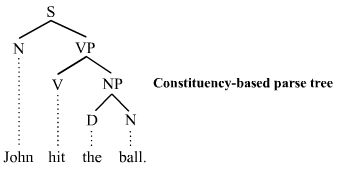](https://commons.wikimedia.org/wiki/File:Parse_tree_1.jpg)

However, syntax defined strictly in terms of parts of speech can be *underdetermined*. 
Consider these two sentences:

> John saw the man with the shoes.

> John saw the man with the binoculars.

In the first case, we understand that the man has the shoes.
However in the second case, we're not sure who has the binoculars.
It could be John, who is using them to do the seeing, or is could be the man who is carrying them.
This second case shows how the individual words can be important for building the right parse tree, i.e. the parse tree that matches the meaning of the sentence.

In linguistics, what a sequence of words means is a question of **semantics** and **pragmatics**.
Semantics tends to follow the structure of the syntax, as in the examples above, but also captures invariances like active/passive voice:

> John saw the man

> The man was seen by John

These two sentences mean the same thing even though the subjects and objects have been reversed.
Pragmatics goes even further from surface meaning by considering what the speaker *intended* rather than what was *said*.
A classic example is

> Can you pass the salt?

The correct response to this is not a yes/no answer but rather the physical act of passing the salt, because this is a *request*, not an information-seeking question.

Larger sequences of text beyond the sentence likewise introduce additional complications and structure.
For example, essays typically have introductions and conclusions, and we expect *narrative* and *expository* text to have their own distinct conventions related to their purposes.
However, in this course we will primarily focus on words and to some extent, sentences.

## Words/sentences as latent variables

Why are words so complicated?
Let's step back for a moment and consider non-complicated data and how it is different.

One example of non-complicated data is height.
When we want to measure height, we get a device like a measuring stick and read height directly off the stick.
Another example is counting cars passing by us on the street.
How are words different from measuring height or counting cars?

One way of understanding the difference is in terms of **observable variables** and **latent variables.**
Height and cars passing by are things we can directly observe and measure - we can use our perception and instruments (like a measuring stick) to quantify them.
Latent variables, on the other hand, cannot be directly observed; instead we must **infer** their values using observed variables that are *associated* with the latent variable.
Importantly, latent variables can have *many* associated observed variables. 

When you think about words, it makes sense to think of the **meaning as a latent variable and words as an observed variable.**
At any given moment, a speaker has a meaning they want to convey and chooses some words to express that meaning, but in a different moment they may use different words to express the same meaning.
There is clearly an *association* between the words used and the meaning, but it is not an exact one-to-one relationship. 
Rather one meaning can be expressed by many words (e.g. `fly` and `housefly`), and one word can express many different meanings (e.g.`fly` as insect, motion verb, or adjective meaning 'cool').

When we think about words this way, we can intuitively see that even though multiple words can be used to express the same meaning, not all words are equally likely.
Consider the table of probabilities below for words that a child might use to refer to their father:

| Word   | Probability |
|--------|-------------|
| dad    | .82         |
| father | .15         |
| Steve  | .03         |

We call this a **distribution of words** over the latent variable, with `dad` being the most likely, and the proper name `Steve` being the least likely, all summing to 1 as a probability must.

Just as with words, we can also think of a latent variable representing the meaning of the sentence and a the many *sequences* of words as the observed variable.
For example, we might consider:

> John saw the man

> The man was seen by John

as observed sequences of words generated by the same latent variable.
While in theory it makes sense to think of sentences this way, in practice we can do more if we assume *composition* of multiple latent variables in a sentence.
We assume that compositionality of latent variables explains the systematicity in language, e.g. the recurring patterns and "rules" that seem to structure language.

If all of this seems a little be abstract and not very useful to you, consider that some of the language phenomenon we've already talked about are obviously latent variables (you can't directly observe them).
For example, we all agree that **parts of speech** like noun, verb, etc, exist, but notice you can never directly observe "noun" but only a word that acts like a noun in a given sentence.
Likewise, we all agree that there is some kind of structure in sentences, like parse trees, even though we don't directly observe them.
For both parts of speech and parse trees, we must infer their existence and properties from the patterns of words (which we do directly observe).

## Moving forward with text as data

So where does this leave us?
Can we do anything with text as data?
The answer is most assuredly YES, but we need to think carefully about how to *transform* text into structured data that we can use to answer our research questions.
We also need to be aware of the *limitations* of transforming the data - have we distorted the thing we are trying to study through our transformation?

If we make a mistake, there are different consequences depending on what we do with the data.
If we are trying to show that two different collections of text are different from each other, a bad transformation may cause us to find a difference that doesn't exist (what statisticians call a type 1 error) or fail to find a difference that does exist (what statisticians call a type 2 error).
On the other hand, if our only goal is to predict something using text as data, then we may create a variable (also called a feature or predictor in this context) that doesn't work as well as it could.

The key to success when using text as data is to familiarize yourself with common transformations of text into structured data, understand which transformations are more appropriate for specific questions, and pick up enough basic knowledge in linguistics that you can modify these transformations to new situations that you encounter.
This is the focus of the rest of this course.